# EDA Assignment — Bike Details Dataset



---



**Dataset file expected:** `BIKE DETAILS.csv` (uploaded to the same directory as this notebook).

## Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

(Show the shape and column names as well.)

**Answer (approach):**
Read the CSV using `pd.read_csv()`; then display `df.shape`, `df.columns`, and `df.head(10)`.

In [1]:
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
print('Shape:', df.shape)
print('Columns:', list(df.columns))
df.head(10)

Shape: (1061, 7)
Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


## Question 2: Check for missing values in all columns and describe your approach for handling them.

**Answer (approach):**
- Compute count and percentage of missing values per column using `df.isnull().sum()` and dividing by `len(df)`.
- Handling strategy (example):
  - For critical columns like `selling_price` or `km_driven`: consider dropping rows with missing values or investigating why they are missing.
  - For numeric columns with few missing values: impute with median.
  - For categorical columns: impute with mode or use a special category `'Unknown'`.
  - For high-missing columns: consider dropping the column or using advanced imputation.

The code below prints missing-value summary and demonstrates a simple cleaning approach (drop critical missing rows, median/mode imputation for others).

In [18]:
# Missing values summary
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
miss_counts = df.isnull().sum()
miss_pct = (miss_counts / len(df)) * 100
missing_summary = pd.DataFrame({'missing_count': miss_counts, 'missing_pct': miss_pct}).sort_values('missing_pct', ascending=False)
missing_summary

,missing_count,missing_pct
ex_showroom_price,435,40.999057
selling_price,0,0.000000
name,0,0.000000
year,0,0.000000
seller_type,0,0.000000
owner,0,0.000000
km_driven,0,0.000000


In [3]:
# Demonstration cleaning (do not run blindly in production)
clean = df.copy()
critical_cols = ['selling_price', 'km_driven']
for c in critical_cols:
    if c in clean.columns:
        clean = clean[clean[c].notnull()]

for col in clean.columns:
    if clean[col].dtype.kind in 'biufc' and clean[col].isnull().any():
        clean[col].fillna(clean[col].median(), inplace=True)
    if clean[col].dtype == object and clean[col].isnull().any():
        clean[col].fillna(clean[col].mode().iloc[0], inplace=True)

print('Shape before:', df.shape)
print('Shape after (demo cleaning):', clean.shape)
missing_after = clean.isnull().sum()
missing_after[missing_after>0]

Shape before: (1061, 7)
Shape after (demo cleaning): (1061, 7)


/tmp/ipython-input-1362217066.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean[col].fillna(clean[col].median(), inplace=True)


,0


## Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

**Answer (approach):**
Plot a histogram of `selling_price` with sufficient bins to view skewness. Compute mean and median and report skewness. A right-skew indicates many lower-priced bikes and a few high-priced outliers.

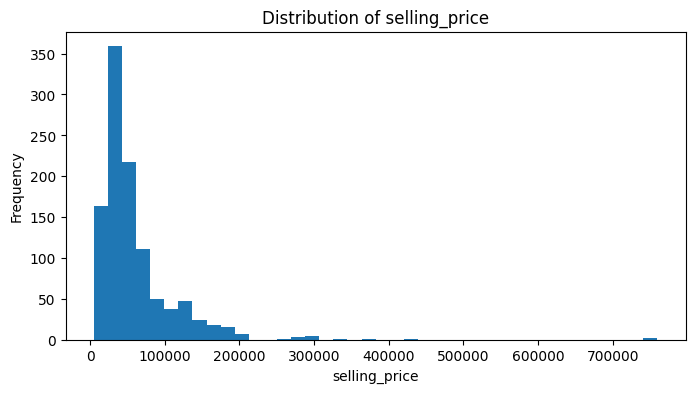

Count: 1061
Mean: 59638.151743638075
Median: 45000.0
Skewness: 4.993784115724287


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
if 'selling_price' in df.columns:
    prices = df['selling_price'].dropna()
    plt.figure(figsize=(8,4))
    plt.hist(prices, bins=40)
    plt.title('Distribution of selling_price')
    plt.xlabel('selling_price')
    plt.ylabel('Frequency')
    plt.show()
    print('Count:', len(prices))
    print('Mean:', prices.mean())
    print('Median:', prices.median())
    print('Skewness:', prices.skew())
else:
    print('Column selling_price not found')

## Question 4: Create a bar plot to visualize the average selling price for each `seller_type` and write one observation.

**Answer (approach):**
Group by `seller_type`, compute mean `selling_price`, and plot a bar chart. Observation should note which seller type has the highest/lowest average selling price.

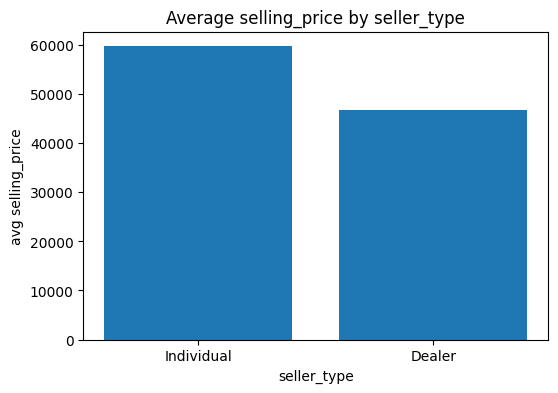

,seller_type,avg_selling_price
0,Individual,59711.923223
1,Dealer,46666.666667


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
if 'seller_type' in df.columns and 'selling_price' in df.columns:
    grp = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)
    plt.figure(figsize=(6,4))
    plt.bar(grp.index.astype(str), grp.values)
    plt.title('Average selling_price by seller_type')
    plt.xlabel('seller_type')
    plt.ylabel('avg selling_price')
    plt.show()
    display(grp.reset_index().rename(columns={'selling_price':'avg_selling_price'}))
else:
    print('Required columns not present')

## Question 5: Compute the average `km_driven` for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

**Answer (approach):**
Identify the ownership column (commonly `owner`) then group by it and compute mean `km_driven`. Visualize results with a bar chart.

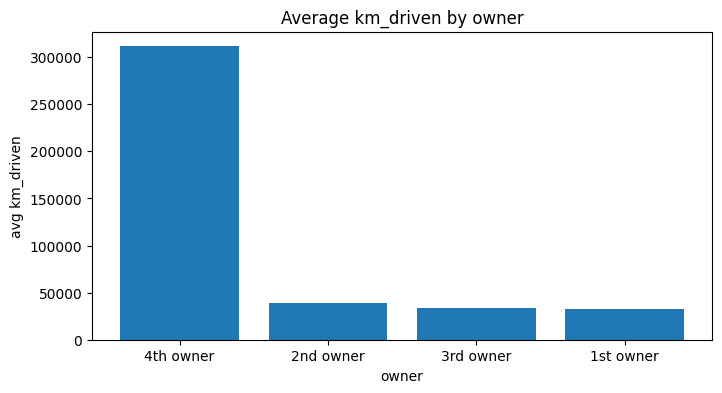

,owner,avg_km_driven
0,4th owner,311500.000000
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,1st owner,32816.583333


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
owner_col = None
for candidate in ['owner','ownership','ownership_type']:
    if candidate in df.columns:
        owner_col = candidate
        break

if owner_col and 'km_driven' in df.columns:
    grp = df.groupby(owner_col)['km_driven'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    plt.bar(grp.index.astype(str), grp.values)
    plt.title('Average km_driven by ' + owner_col)
    plt.xlabel(owner_col)
    plt.ylabel('avg km_driven')
    plt.show()
    display(grp.reset_index().rename(columns={'km_driven':'avg_km_driven'}))
else:
    print('Ownership or km_driven column not found. Available columns:', df.columns.tolist())

## Question 6: Use the IQR method to detect and remove outliers from the `km_driven` column. Show before-and-after summary statistics.

In [15]:
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
if 'km_driven' in df.columns:
    before = df['km_driven'].describe()
    q1 = df['km_driven'].quantile(0.25)
    q3 = df['km_driven'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    print('Before (km_driven):')
    display(before)
    print(f'IQR lower={lower}, upper={upper}')
    df_no_out = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)].copy()
    print('\nAfter removal (km_driven):')
    display(df_no_out['km_driven'].describe())
    print('\nRows before:', len(df), 'Rows after:', len(df_no_out))
else:
    print('km_driven column not found')


Before (km_driven):


,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000


IQR lower=-30750.0, upper=87250.0

After removal (km_driven):


,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000



Rows before: 1061 Rows after: 1022


## Question 7: Create a scatter plot of `year` vs. `selling_price` to explore the relationship between a bike's age and its price.

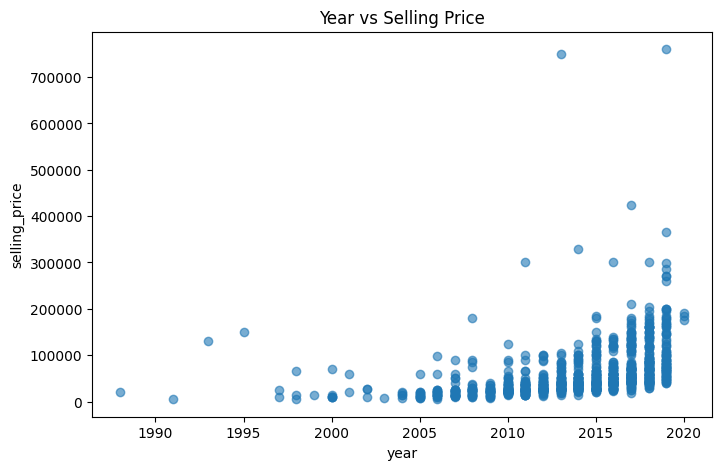

Correlation (year, selling_price): 0.40218840061476036


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
if 'year' in df.columns and 'selling_price' in df.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(df['year'], df['selling_price'], alpha=0.6)
    plt.title('Year vs Selling Price')
    plt.xlabel('year')
    plt.ylabel('selling_price')
    plt.show()
    corr = df[['year','selling_price']].dropna().corr().iloc[0,1]
    print('Correlation (year, selling_price):', corr)
else:
    print('Required columns not found')

## Question 8: Convert the `seller_type` column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

In [13]:
import pandas as pd
df = pd.read_csv('/content/BIKE DETAILS.csv')
if 'seller_type' in df.columns:
    dummies = pd.get_dummies(df['seller_type'], prefix='seller')
    df_ohe = pd.concat([df.reset_index(drop=True), dummies.reset_index(drop=True)], axis=1)
    display(df_ohe.head(5))
else:
    print('seller_type column not found')

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,False,True


## Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

Numeric columns: ['selling_price', 'year', 'km_driven', 'ex_showroom_price']


,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000000,0.402188,-0.212937,0.918583
year,0.402188,1.000000,-0.288675,0.126378
km_driven,-0.212937,-0.288675,1.000000,-0.122011
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000


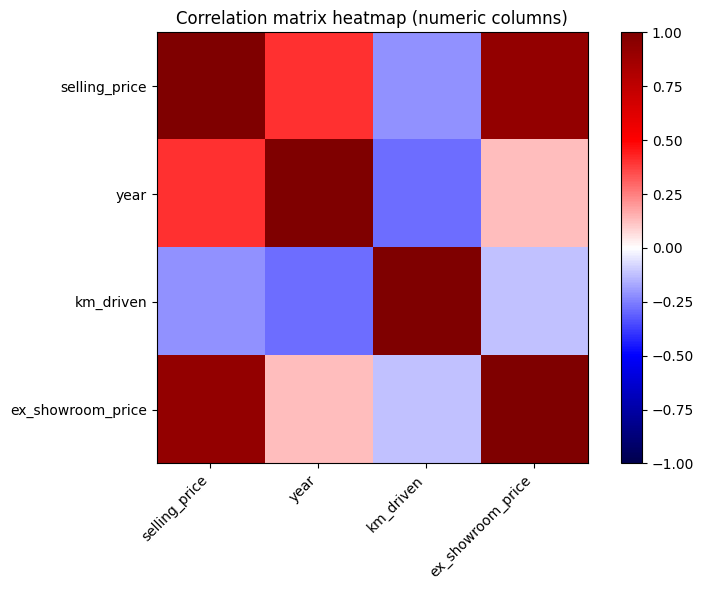


Strongest absolute correlation: ('selling_price', 'ex_showroom_price') value: 0.9185833148930261


In [10]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
df = pd.read_csv('BIKE DETAILS.csv')
num = df.select_dtypes(include=[np.number])
corr = num.corr()
print('Numeric columns:', list(num.columns))
display(corr)
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest', cmap='seismic', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation matrix heatmap (numeric columns)')
plt.tight_layout()
plt.show()

# Identify strongest correlations (absolute value) excluding self correlations
corr_vals = corr.abs().where(~np.eye(corr.shape[0],dtype=bool))
if not corr_vals.empty:
    max_pair = corr_vals.stack().idxmax()
    max_value = corr_vals.stack().max()
    print('\nStrongest absolute correlation:', max_pair, 'value:', max_value)
else:
    print('Not enough numeric columns to compute pairwise correlations')

## Question 10: Summarize your findings in a brief report:

- What are the most important factors affecting a bike's selling price?
- Mention any data cleaning or feature engineering you performed.

### Summary Report (template)

Use the outputs above to fill in precise values. Typical findings to report:
- **Factors affecting price:** `year` (newer bikes → higher price), `km_driven` (higher km → lower price), `seller_type` sometimes shows varied average prices, brand/model features if present.
- **Data cleaning performed:** Checked missing values, showed demo imputation and dropping strategy for critical columns; used IQR to remove `km_driven` outliers; converted categorical `seller_type` to one-hot encoded features.

Interpret these sections by inspecting the numeric outputs and plots generated earlier in this notebook.